## Perkenalan

Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

<b>Nama:</b> RohMad <br/>
<b>Phase:</b> 1<br/>
<b>Type: </b> Milestone 1
<br/>
<b>Dataset:</b> This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.
<br/>

There are 25 variables:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

<br/> 
<b>Link:</b>https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

<br/>
<b>Objective:</b> Predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients.

## Import pustaka yang dibutuhkan

Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import pickle
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

#Import Model Machine Learning
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split

## Data Loading

Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan explorasi data secara sederhana.

In [2]:
df_raw = pd.read_csv('./data/uci_credit_card.csv')

In [3]:
print(df_raw.shape)
df_raw.head(5)

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

## Data Cleaning

Bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa memberi nama baru untuk setiap kolom, mengisi missing values, menghapus kolom yang tidak dipakai, dan lain sebagainya.

In [5]:
df_raw.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [6]:
df_raw.rename(columns={
    'PAY_0': 'PAY_SEPT',
    'PAY_2': 'PAY_AUG',
    'PAY_3': 'PAY_JUL',
    'PAY_4': 'PAY_JUN',
    'PAY_5': 'PAY_MEI',
    'PAY_6': 'PAY_APR',
    'BILL_AMT1': 'BILL_AMT_SEPT',
    'BILL_AMT2': 'BILL_AMT_AUG',
    'BILL_AMT3': 'BILL_AMT_JUL',
    'BILL_AMT4': 'BILL_AMT_JUN',
    'BILL_AMT5': 'BILL_AMT_MEI',
    'BILL_AMT6': 'BILL_AMT_APR',
    'PAY_AMT1': 'PAY_AMT_SEPT',
    'PAY_AMT2': 'PAY_AMT_AUG',
    'PAY_AMT3': 'PAY_AMT_JUL',
    'PAY_AMT4': 'PAY_AMT_JUN',
    'PAY_AMT5': 'PAY_AMT_MEI',
    'PAY_AMT6': 'PAY_AMT_APR',
    'default.payment.next.month': 'TARGET'
},
              inplace=True)

#####  Profiling Data RAW to HTML

In [7]:
# report = df_raw.profile_report(title="Credit Card Dataset",
#                              progress_bar=False)
# report.to_file("creditcard.html")

##### Chek duplicated values

In [8]:
df_raw.duplicated().sum()

0

In [9]:
df_raw.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MEI,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MEI,PAY_AMT_APR,TARGET
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Bisa kita lihat bahwa untuk kategori umur memiliki rentang usia 17-95 tahun, usia terendah adalah 17 tahun dan usia tertinggi adalah 98 tahun, rata-rata umur adalalh 40 tahun.

## Explorasi Data

Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [10]:
df_raw.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MEI,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MEI,PAY_AMT_APR,TARGET
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


In [11]:
num_dat = df_raw.drop(columns=[
    'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_SEPT', 'PAY_AUG', 'PAY_JUL',
    'PAY_JUN', 'PAY_MEI', 'PAY_APR', 'TARGET'
])
cat_dat = df_raw[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_SEPT', 'PAY_AUG', 'PAY_JUL',
    'PAY_JUN', 'PAY_MEI', 'PAY_APR', 'TARGET']]

In [12]:
num_dat.head(3)

,ID,LIMIT_BAL,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MEI,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MEI,PAY_AMT_APR
0,1,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0


In [13]:
cat_dat.head(3)

,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MEI,PAY_APR,TARGET
0,2,2,1,2,2,-1,-1,-2,-2,1
1,2,2,2,-1,2,0,0,0,2,1
2,2,2,2,0,0,0,0,0,0,0


#### Visualisasi Sederhana

In [14]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Ploting"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Saving figure attribute_histogram_plots


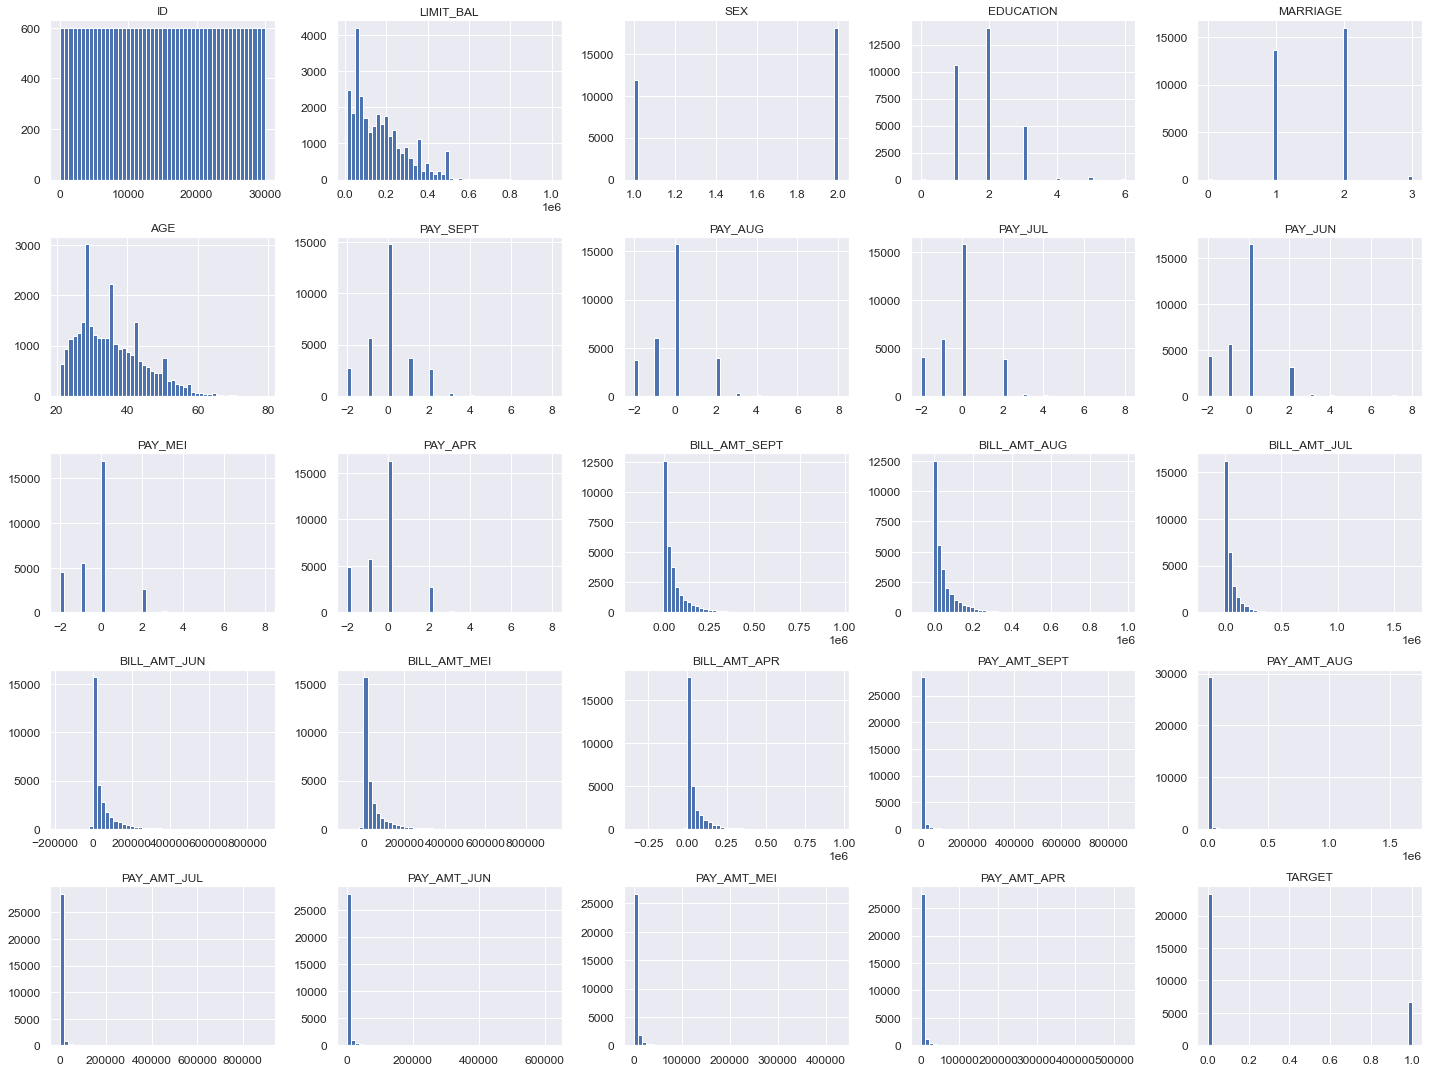

In [15]:
df_raw.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

 - Rata-rata age ada diangke 35 tahun, terlihat durasi skew ke kanan artinya data tidak terdistribusi dengan normal.
 - Smua data memiliki banyak outliers.

### Distrubusi Numerik

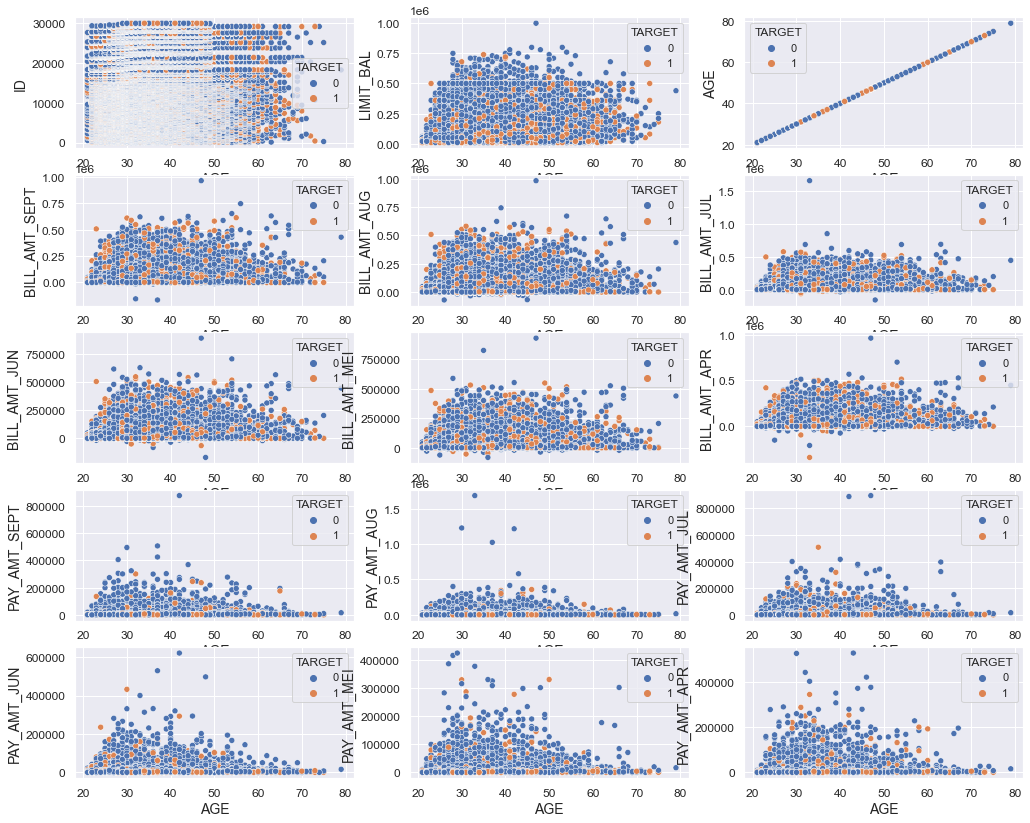

In [16]:
#Hubungan semua data numerik dengan age untuk melihat kontinuitas

fig,axes=plt.subplots(nrows=5,ncols=3,figsize=(17,14))
i=0
j=0
for col in num_dat.columns:
    sns.scatterplot(data=df_raw, x='AGE',y=col, hue='TARGET',ax=axes[i][j])
    j+=1
    if j>2:
        i+=1
        j=0

### Distribusi Category

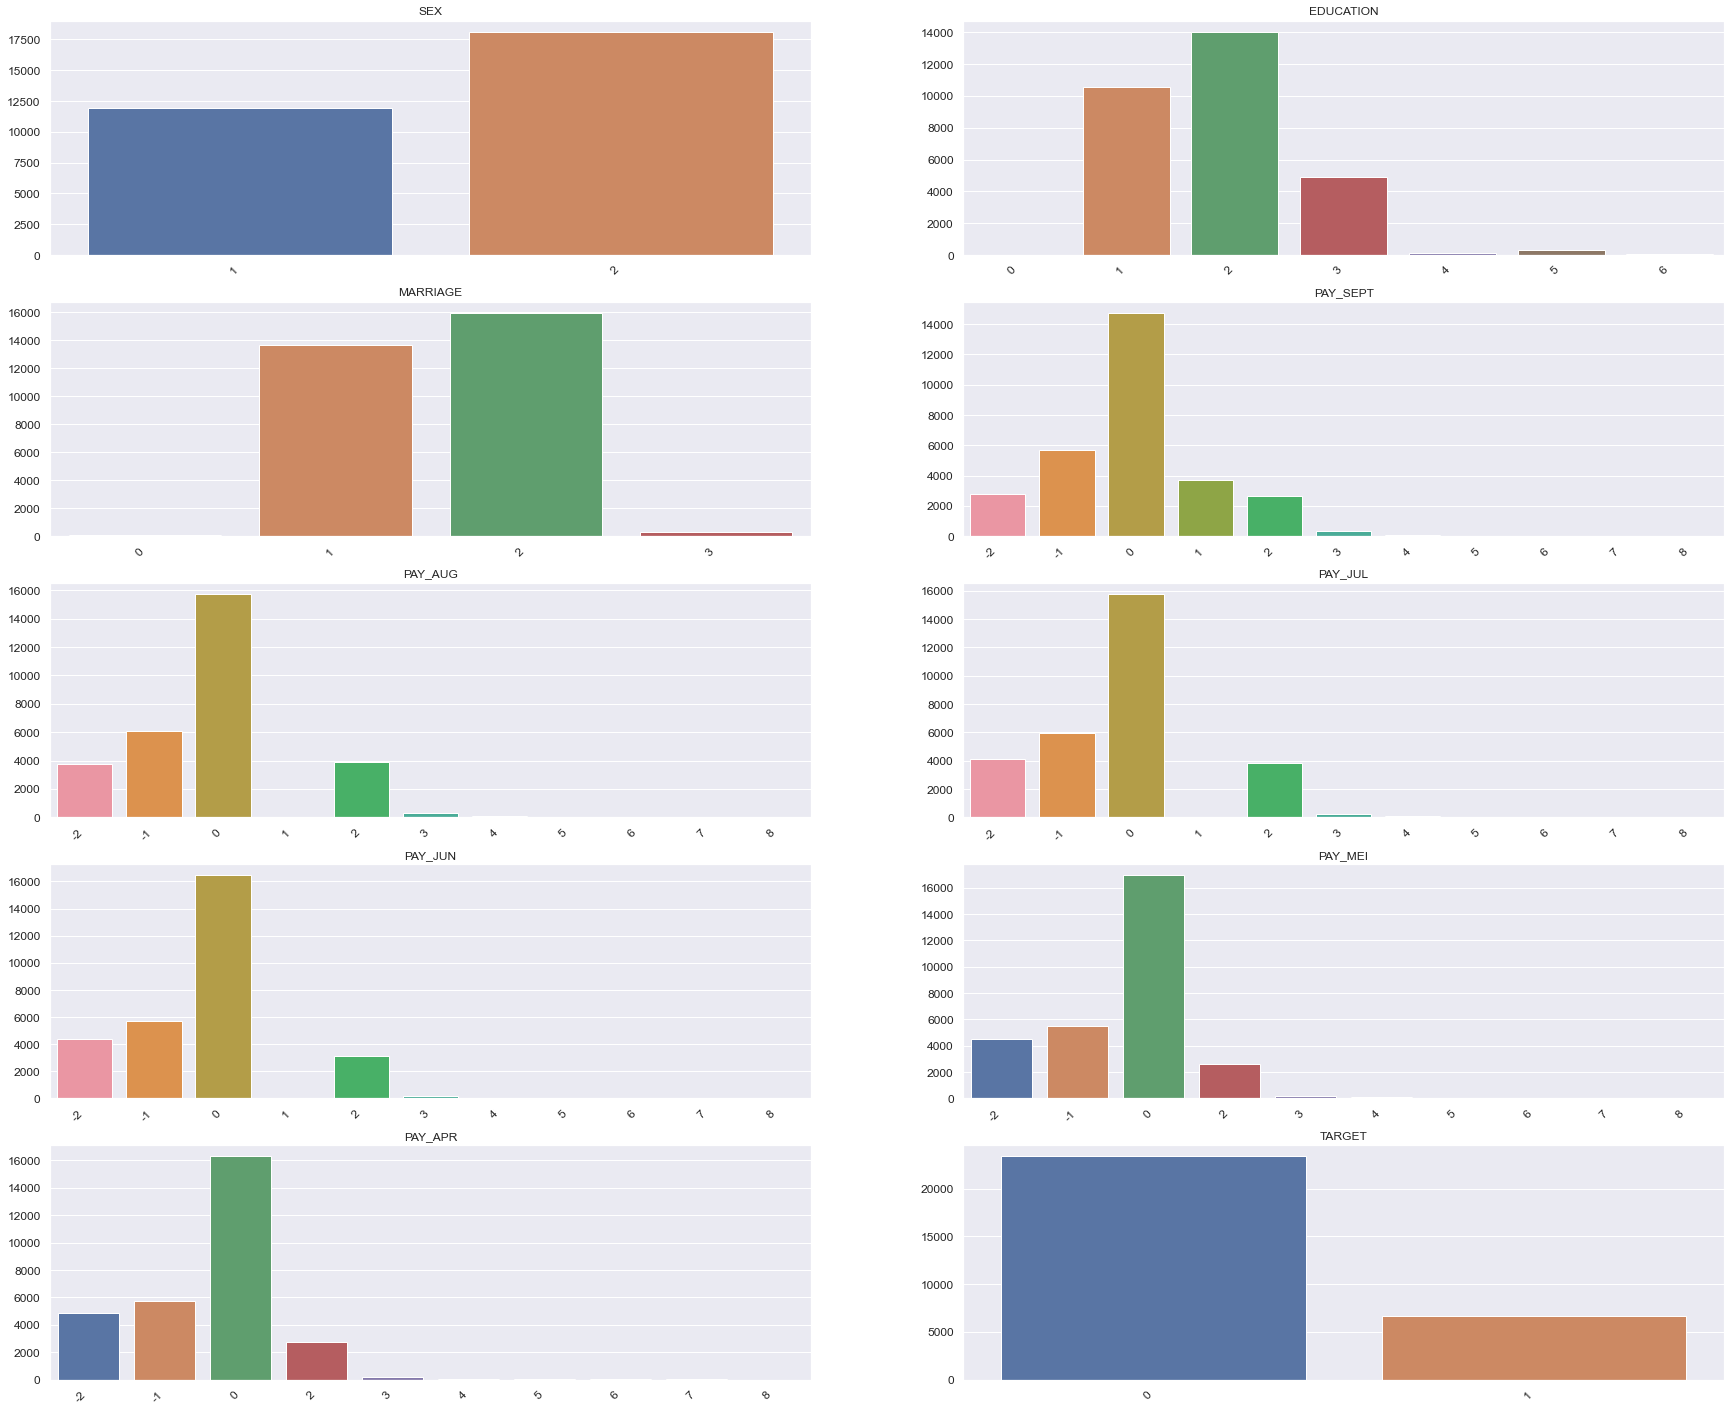

In [17]:
fig,axes=plt.subplots(nrows=5,ncols=2,figsize=(30,25))
i=0
j=0

for col in cat_dat.columns:
    val=cat_dat[col].value_counts()
    sns.barplot(x=val.index, y=val.values, ax=axes[i][j])
    axes[i][j].set_xticklabels(axes[i][j].get_xticklabels(), rotation=45, ha='right')
    axes[i][j].set_title(col)
    j+=1
    if j>1:
        i+=1
        j=0

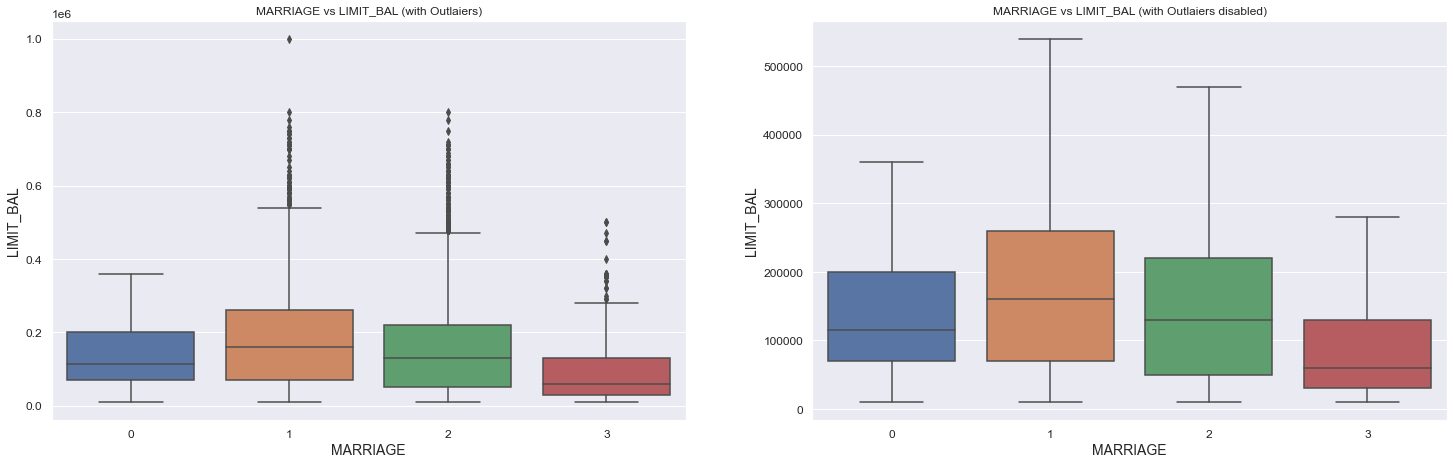

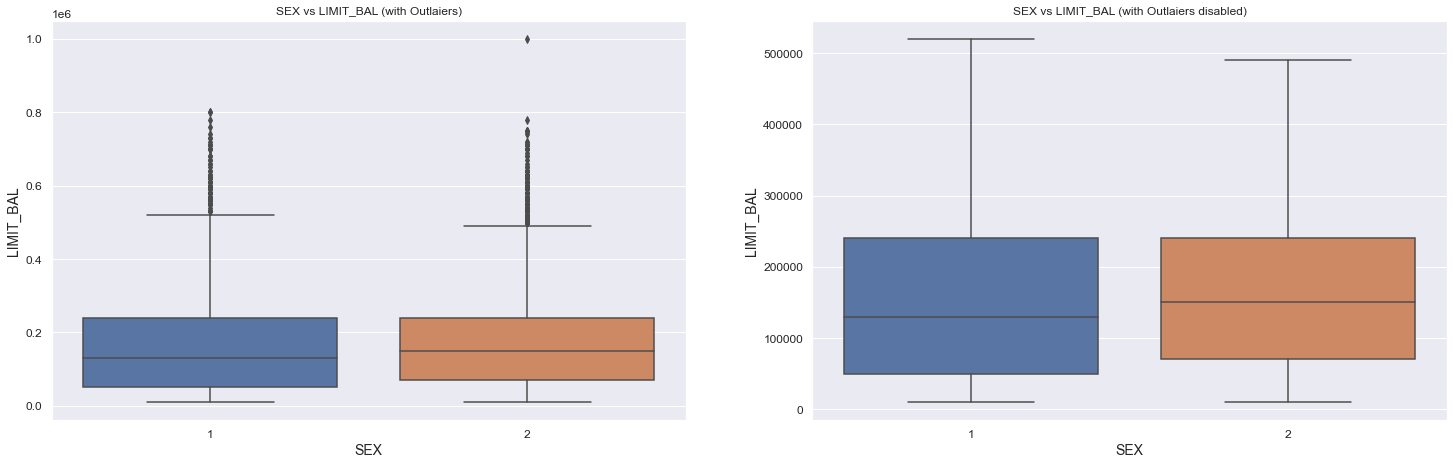

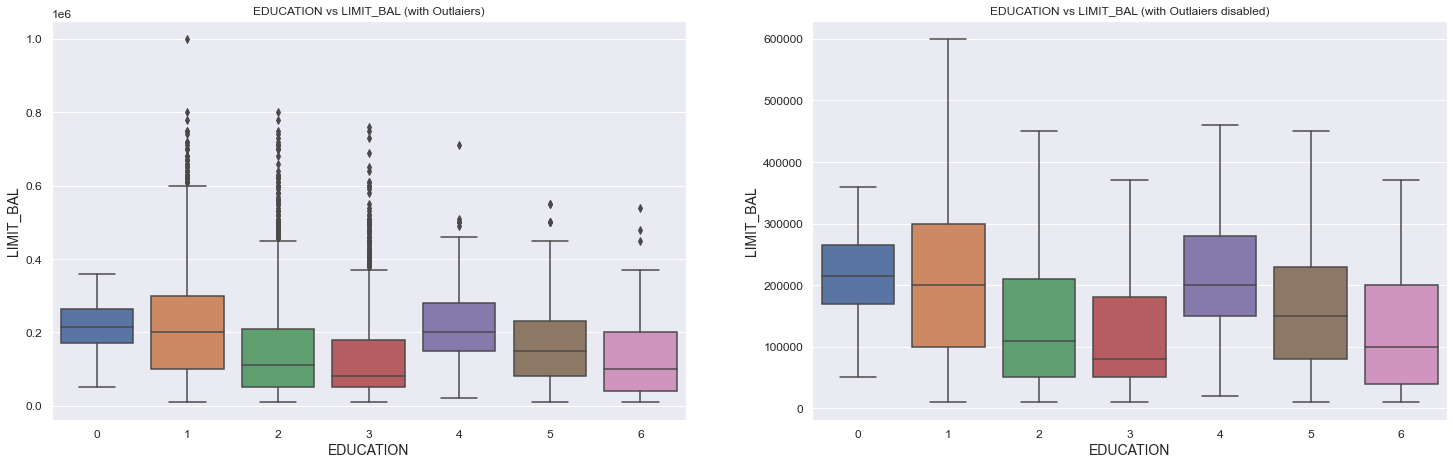

In [167]:
#fig, axs = plt.subplots(3,2, figsize=(30,30))
axs = 1
for i in ['MARRIAGE', 'SEX', 'EDUCATION']:
    plt.figure(figsize=(25,25))
    plt.subplot(3,2,axs)
    sns.boxplot(data=df_raw, y='LIMIT_BAL', x=i)
    plt.title(i + ' vs LIMIT_BAL (with Outlaiers)')
    
    plt.subplot(3,2,axs+1)
    sns.boxplot(data=df_raw, y='LIMIT_BAL', x=i, showfliers=False)
    plt.title(i + ' vs LIMIT_BAL (with Outlaiers disabled)')
    axs += 2

plt.show()

<AxesSubplot:>

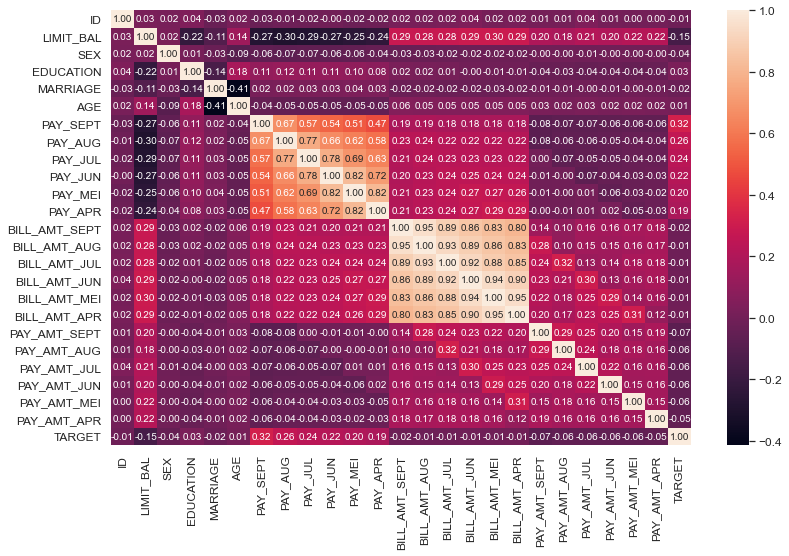

In [18]:
plt.figure(figsize=(13,8))
sns.heatmap(df_raw.corr(), annot=True, fmt='.2f')

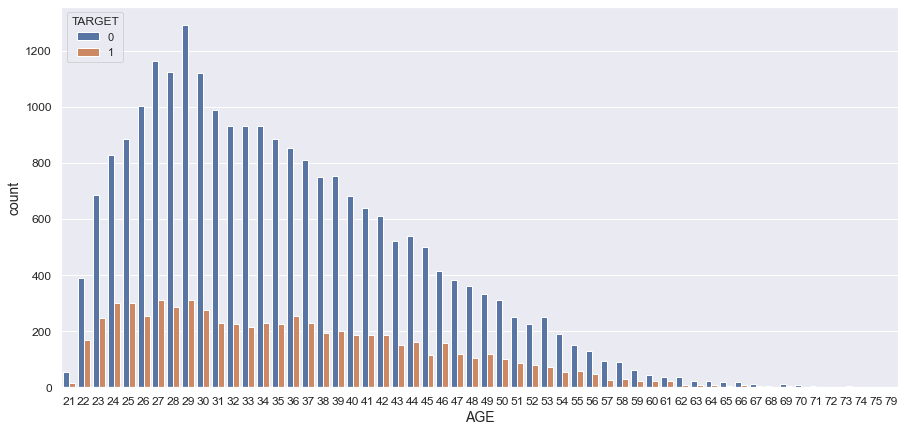

In [165]:
plt.figure(figsize=(15,7))
sns.countplot(data=df_raw, x='AGE', hue='TARGET');

## Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-val-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

### Feature Enginering

##### Encoding values unknown

In [15]:
col_edit_1=df_raw['EDUCATION']
col_edit_1 = col_edit_1.apply(lambda x:1 if x == 1 else x)
col_edit_1 = col_edit_1.apply(lambda x:2 if x == 2 else x)
col_edit_1 = col_edit_1.apply(lambda x:3 if x == 3 else x)
col_edit_1 = col_edit_1.apply(lambda x:4 if x == 4 else x)
col_edit_1 = col_edit_1.apply(lambda x:5 if x == 5 else x)
col_edit_1 = col_edit_1.apply(lambda x:5 if x == 6 else x)
col_edit_1 = col_edit_1.apply(lambda x:5 if x == 0 else x)

In [16]:
col_edit_2=df_raw['MARRIAGE']
col_edit_2 = col_edit_2.apply(lambda x:1 if x == 1 else x)
col_edit_2 = col_edit_2.apply(lambda x:2 if x == 2 else x)
col_edit_2 = col_edit_2.apply(lambda x:3 if x == 3 else x)
col_edit_2 = col_edit_2.apply(lambda x:0 if x == 3 else x)

In [17]:
col_edit_3=df_raw['SEX']
col_edit_3 = col_edit_3.apply(lambda x:1 if x == 1 else x)
col_edit_3 = col_edit_3.apply(lambda x:2 if x == 2 else x)

In [18]:
df_raw.replace({
    'PAY_SEPT': {
        '-2': '9'
    },
    'PAY_AUG': {
        '-2': '9'
    },
    'PAY_JUL': {
        '-2': '9'
    },
    'PAY_JUN': {
        '-2': '9'
    },
    'PAY_MEI': {
        '-2': '9'
    },
    'PAY_APR': {
        '-2': '9'
    },
})

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MEI,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MEI,PAY_AMT_APR,TARGET
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [19]:
nominal=cat_dat.drop(columns=['TARGET']).reset_index(drop=True)

In [20]:
X=pd.concat([nominal,num_dat.drop(columns=['ID'])],axis=1).reset_index(drop=True)
y=cat_dat.TARGET

In [21]:
X.iloc[:,:-3].head(3)

,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MEI,PAY_APR,LIMIT_BAL,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MEI,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL
0,2,2,1,2,2,-1,-1,-2,-2,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0
1,2,2,2,-1,2,0,0,0,2,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0
2,2,2,2,0,0,0,0,0,0,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0


#### Feature Selection with Random Forest

<AxesSubplot:>

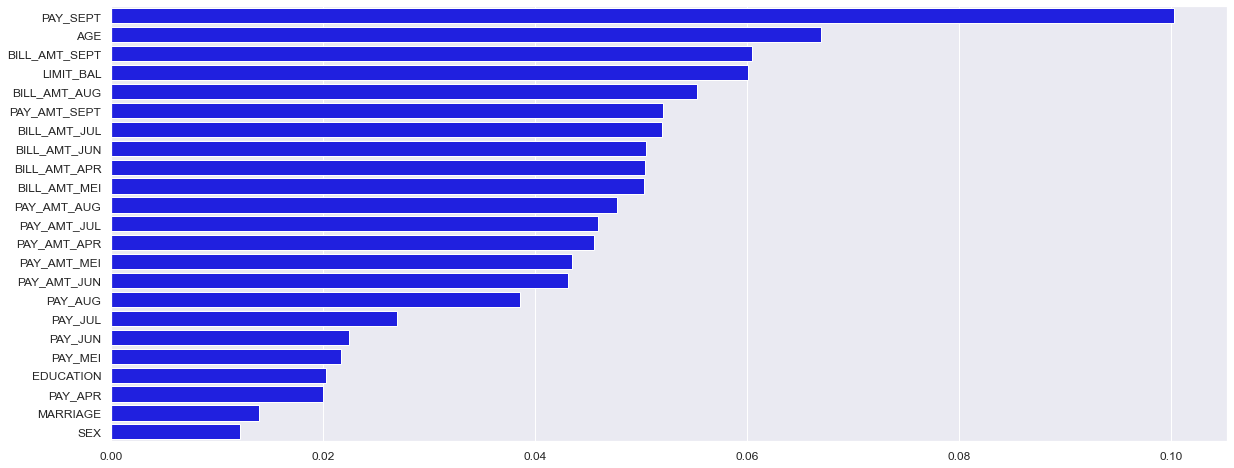

In [29]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X,y)
fig, (ax)=plt.subplots(ncols=1, figsize=(20,8))
sorted_idx =np.flip(rf.feature_importances_.argsort())
sns.barplot(y=X.columns[sorted_idx], x=rf.feature_importances_[sorted_idx],ax=ax, color="blue")

In [53]:
X_new=X[X.columns[sorted_idx][:-8]]
X_new.head(3)

,PAY_SEPT,AGE,BILL_AMT_SEPT,LIMIT_BAL,BILL_AMT_AUG,PAY_AMT_SEPT,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_APR,BILL_AMT_MEI,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_APR,PAY_AMT_MEI,PAY_AMT_JUN
0,2,24,3913.0,20000.0,3102.0,0.0,689.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,-1,26,2682.0,120000.0,1725.0,0.0,2682.0,3272.0,3261.0,3455.0,1000.0,1000.0,2000.0,0.0,1000.0
2,0,34,29239.0,90000.0,14027.0,1518.0,13559.0,14331.0,15549.0,14948.0,1500.0,1000.0,5000.0,1000.0,1000.0


##### Check Base Score

In [54]:
df_raw['TARGET'].value_counts()

0    23364
1     6636
Name: TARGET, dtype: int64

In [55]:
23364/(23364+6636)

0.7788

#### Splitting Data

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=7)

## Pendefinisian Model

Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model. Akan lebih bagus jika didahului dengan penjelasan mengapa memilih arsitektur atau jenis model tertentu, alasan memilih nilai hyperparameter, dan hal lain yang berkaitan.

<b>Model yang digunakan adalah 5 model tipe Clasification Ensemble Learning, ini bermaksud untuk mengklasifikasiakn antara variabel feature dengan variabel target, dan membandingkan mana model algoritma terbaik.</b>

### 1. Model Decision Tree

Nilai hyperparamater yang digunakan disini adalah {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 18, 'min_samples_split': 2, 'splitter': 'best'}, berdasarkan GridSeacrh Cross Validation sebagai pencari nilai parameter terbaik.

### 2. Model Random Forest

Nilai hyperparamater yang digunakan disini adalah {'n_estimators': 20, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 60, 'bootstrap': False}, berdasarkan Randomize Seacrh Cross Validation sebagai pencari nilai parameter terbaik.

### 3. Model KNN (K-Neighboard Nearest)

Nilai hyperparamater yang digunakan disini adalah {'weights': 'distance', 'n_neighbors': 1, 'metric': 'euclidean', 'leaf_size': 8}, berdasarkan Randomize Seacrh Cross Validation sebagai pencari nilai parameter terbaik.

### 4. Model Naive Bayes

Nilai hyperparamater yang digunakan disini adalah {'var_smoothing': 0.0533669923120631}, berdasarkan Randomize Seacrh Cross Validation sebagai pencari nilai parameter terbaik.

### 5. Model XGBoost

Model yang digunakan adalah XGBoost, ini saya gunakan bertujuan untuk membandingkan atara 6 Model yang sudah ada, dengan alasan XGBoost salah satu keluarga decission tree terbaik selain Random Forest

Nilai hyperparamater yang digunakan disini adalah {'n_estimators': 40, 'min_child_weight': 15, 'max_depth': 10, 'gamma': 3, 'colsample_bytree': 0.9}, berdasarkan Randomize Seacrh Cross Validation sebagai pencari nilai parameter terbaik.

## Pelatihan Model

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan.

### Pipeline

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [58]:
models_dict = {}

# DecisionTree
models_dict["DecisionTree"] = Pipeline([('preprocessing', StandardScaler()),
                              ('classifier',
                               DecisionTreeClassifier(max_depth=8))])
# Random Forest
models_dict["RandomForest"] = Pipeline([('preprocessing', StandardScaler()),
                              ('classifier',
                               RandomForestClassifier(n_estimators=10))])
# KNN
models_dict["K-NN"] = Pipeline([('preprocessing', StandardScaler()),
                               ('classifier',
                                KNeighborsClassifier(n_neighbors=4))])
# Gaussian Naive Bayes
models_dict["GaussianNB"] = Pipeline([('preprocessing', StandardScaler()),
                               ('classifier', GaussianNB(var_smoothing=0.3))])
# XGBoost
models_dict["XGBoost"] = Pipeline([('preprocessing', StandardScaler()),
                                ('classifier', XGBClassifier(n_estimators=10, verbosity=0))
                                ])

In [59]:
for model_name, model in models_dict.items():
    print("Training model {0}".format(model_name))
    %time model.fit(X_train, y_train)

Training model DecisionTree
Wall time: 295 ms
Training model RandomForest
Wall time: 688 ms
Training model K-NN
Wall time: 83.8 ms
Training model GaussianNB
Wall time: 22.9 ms
Training model XGBoost
Wall time: 514 ms


## Evaluasi Model

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model.

In [60]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [61]:
# MSE, MAE, R2, RMSE Method One
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#TRAIN
print("TRAIN RESULT :\n================================================")
print(f'MSE: {mean_squared_error(y_train,y_train_pred): .2f}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_train,y_train_pred)): .2f}')
print(f'r2: {r2_score(y_train,y_train_pred): .2f}')
#TEST
print("TEST RSEULT:\n================================================")
print(f'MSE: {mean_squared_error(y_test,y_test_pred): .2f}')
print(f'MAE: {mean_absolute_error(y_test,y_test_pred): .2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_test_pred)): .2f}')
print(f'r2: {r2_score(y_test,y_test_pred): .2f}')

TRAIN RESULT :
MSE:  0.17
RMSE: 0.41
r2:  0.04
TEST RSEULT:
MSE:  0.18
MAE:  0.18
RMSE:  0.43
r2: -0.06


In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print(accuracy_score(y_test, y_test_pred))

[[6677  342]
 [1290  691]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7019
           1       0.67      0.35      0.46      1981

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.67      9000
weighted avg       0.80      0.82      0.80      9000

0.8186666666666667


### Model Improvement

#### RandomizeCV-searching preprocessing steps and model parameters

In [63]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', DecisionTreeClassifier())])

In [64]:
from sklearn.model_selection import RandomizedSearchCV

params = [{
    'classifier': [DecisionTreeClassifier()],
    'preprocessing': [StandardScaler(), None],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [(list(range(1, 20)))],
    'classifier__min_samples_split': [2, 3, 4],
    'classifier__min_samples_leaf': [(list(range(1, 20)))],
}, {
    'classifier': [RandomForestClassifier()],
    'preprocessing': [StandardScaler(), None],
    'classifier__n_estimators':
    [[int(x) for x in np.linspace(start=10, stop=100, num=10)]],
    'classifier__max_features': ['auto', 'sqrt'],
    'classifier__max_depth': [[int(x) for x in np.linspace(10, 110, num=11)]],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}, {
    'classifier': [KNeighborsClassifier()],
    'preprocessing': [StandardScaler(), None],
    'classifier__leaf_size': [2, 4, 6, 8, 10, 20],
    'classifier__n_neighbors': [2, 4, 6, 8, 10, 20, 30],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric' : ['minkowski', 'euclidean', 'manhattan']
}, {
    'classifier': [GaussianNB()],
    'preprocessing': [StandardScaler(), None],
    'classifier__var_smoothing': [np.logspace(0, -9, num=100)]
}, {
    'classifier': [XGBClassifier(verbosity=0)],
    'preprocessing': [StandardScaler(), None],
    'classifier__gamma': [1, 2, 3],
    'classifier__max_depth': [(list(range(1, 20)))],
    'classifier__n_estimators':
    [[int(x) for x in np.linspace(start=10, stop=100, num=10)]],
    'classifier__min_child_weight': [
        10,
        15,
        20,
    ],
    'classifier__colsample_bytree': [0.8, 0.9, 1],
}]

randomize = RandomizedSearchCV(pipe, params, cv=5, n_jobs=-1)
%time randomize.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(randomize.best_score_))
print("Train set score: {:.2f}".format(randomize.score(X_train, y_train)))
print("Test set score: {:.2f}".format(randomize.score(X_test, y_test)))
print("Best parameters: {}".format(randomize.best_params_))

Wall time: 37.1 s
Best cross-validation accuracy: 0.81
Train set score: 0.82
Test set score: 0.81
Best parameters: {'preprocessing': StandardScaler(), 'classifier__weights': 'uniform', 'classifier__n_neighbors': 20, 'classifier__metric': 'manhattan', 'classifier__leaf_size': 20, 'classifier': KNeighborsClassifier(leaf_size=20, metric='manhattan', n_neighbors=20)}


Best parameters: 'preprocessing': StandardScaler(), <br/>
'classifier__weights': 'uniform', <br/>
'classifier__n_neighbors': 30, <br/>
'classifier__metric': 'euclidean', <br/>
'classifier__leaf_size': 20, <br/>
'classifier': KNeighborsClassifier()

In [67]:
y_test_pred = randomize.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print(accuracy_score(y_test, y_test_pred))

[[6686  333]
 [1354  627]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7019
           1       0.65      0.32      0.43      1981

    accuracy                           0.81      9000
   macro avg       0.74      0.63      0.66      9000
weighted avg       0.79      0.81      0.79      9000

0.8125555555555556


In [69]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_test_pred)
matrix

array([[6686,  333],
       [1354,  627]], dtype=int64)

In [70]:
tn, fp, fn, tp = matrix.ravel()

print(f'TN: {tn}')
print(f'FP: {fp}')
print(f'FN: {fn}')
print(f'TP: {tp}')

TN: 6686
FP: 333
FN: 1354
TP: 627


Text(0.5, 30.5, 'Predicted label')

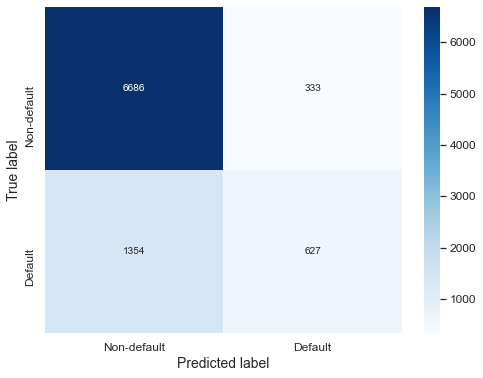

In [71]:
plt.figure(figsize=(8,6))
ConfMatrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')

#### PR Curve

In [72]:
from sklearn.model_selection import cross_val_predict
%time y_scores = cross_val_predict(randomize, X_test, y_test, cv=5)

Wall time: 27.5 s


In [73]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

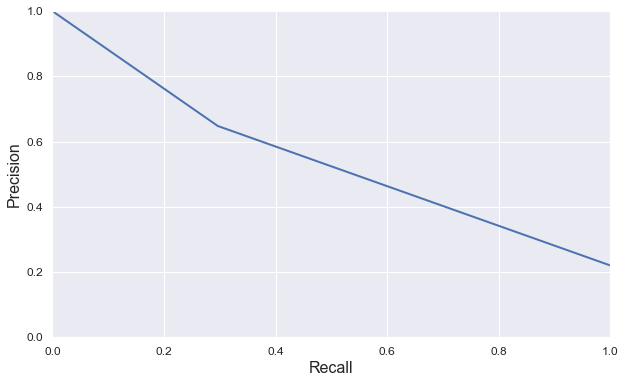

In [74]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(10, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [75]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_scores)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.35


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.35')

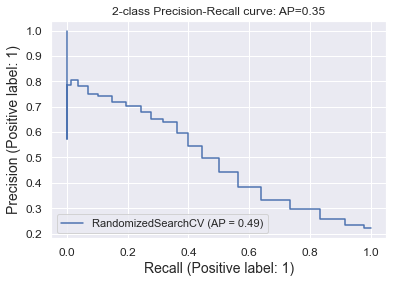

In [76]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(randomize, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

#### ROC Curve

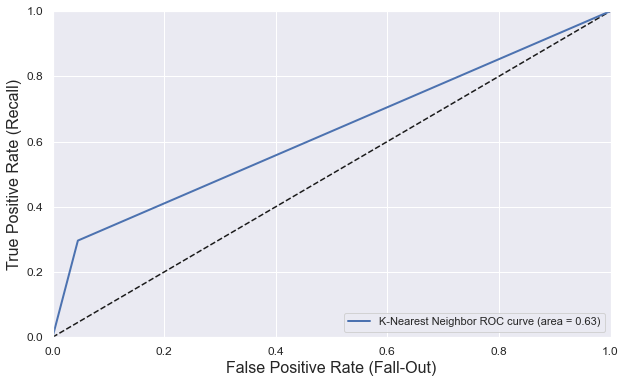

In [77]:
from sklearn.metrics import roc_curve,auc
plt.figure(figsize=(10, 6))                                    # Not shown
plt.axis([0, 1, 0, 1])                                    # Not shown in the book
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
plt.grid(True)                                            # Not shown
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
labels=['K-Nearest Neighbor']
for idx,model in enumerate([randomize]):
    y_scores
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2,label=labels[idx] + ' ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")

## Model Inference

Bagian ini diisi dengan model inference, di mana model yang sudah kita latih akan dicoba pada data selain data yang sudah tersedia. Data yang dimaksud bisa berupa data buatan oleh student, ataupun data yang ada pada internet.

##### Mencoba pengujian dengan data yang dibuat student

In [78]:
X_new.head(1)

,PAY_SEPT,AGE,BILL_AMT_SEPT,LIMIT_BAL,BILL_AMT_AUG,PAY_AMT_SEPT,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_APR,BILL_AMT_MEI,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_APR,PAY_AMT_MEI,PAY_AMT_JUN
0,2,24,3913.0,20000.0,3102.0,0.0,689.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0


In [85]:
data_baru = [[
    3, 30, 4413, 50000, 2302, 799, 200, 0, 0, 3000, 891,
    0, 2, 0, 3000
]]

prediksi = pd.DataFrame(data_baru)

In [86]:
prediksi.rename(columns={
    0:"PAY_SEPT",
    1: "AGE",
    2: "BILL_AMT_SEPT",
    3: "LIMIT_BAL",
    4: "BILL_AMT_AUG",
    5: "BILL_AMT_JUL",
    6: "BILL_AMT_APR",
    7: "PAY_AMT_SEPT",
    8: "BILL_AMT_MEI",
    9: "BILL_AMT_JUN",
    10: "PAY_AMT_AUG",
    11: "PAY_AMT_JUL",
    12: "PAY_AMT_APR",
    13: "PAY_AMT_MEI",
    14: "PAY_AMT_JUN",

},
                inplace=True)

In [87]:
prediksi

,PAY_SEPT,AGE,BILL_AMT_SEPT,LIMIT_BAL,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_APR,PAY_AMT_SEPT,BILL_AMT_MEI,BILL_AMT_JUN,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_APR,PAY_AMT_MEI,PAY_AMT_JUN
0,3,30,4413,50000,2302,799,200,0,0,3000,891,0,2,0,3000


### Prediction

#### Model Random Forest

Melihat dari perbandingan skor antar model, kami menyimpulkan bahwa Random Forest adalah model yang terbaik, yang akan kita gunakan untuk prediksi data baru, meskipun model XGBoost memiliki skor testing yang sama namun training lebih unggul model Random Forest.

In [88]:
predict = randomize.predict(prediksi)
######################################
predicted = predict[0]
if predicted == 0:
    print("Clients are not credible")
else:
    print("Credible clients")

Credible clients


## Pengambilan Kesimpulan

Pada bab terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan dibandingkan dengan objective yang sudah ditulis di bagian pengenalan.

### Model Analysis

Dari hasil training dan evaluasi model, model K-NN merupakan model terbaik yang dapat digunakan untuk dataset ini terbukti dari nilai best accuracy yaitu 81%

## Serilizing Pickle

Pickling adalah cara untuk mengubah objek python(list, dict, etc) menjadi karakter stream.

In [90]:
from sklearn.pipeline import make_pipeline

pipe_short_dt = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(
        weights='uniform',
        n_neighbors=30,
        metric='euclidean',
        leaf_size=20,
    ))
%time pipe_short_dt.fit(X_train, y_train)

Wall time: 106 ms


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(leaf_size=20, metric='euclidean',
                                      n_neighbors=30))])

In [91]:
%time pickle.dump(pipe_short_dt, open('model_knn_clf.pkl','wb'))

Wall time: 9.98 ms


## ============================TERIMA KASIH===========================